In [658]:
from pathlib import Path
import random
from typing import Union

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def quadratic_map(
    xy: tuple[float, float],
    cx: float,
    ax1: float,
    ax2: float,
    bx1: float,
    bx2: float,
    abx: float,
    cy: float,
    ay1: float,
    ay2: float,
    by1: float,
    by2: float,
    aby: float,
) -> tuple[float, float]:
    x = xy[0]
    y = xy[1]
    x_new = ax1 * x + ax2 * x**2 + bx1 * y + bx2 * y**2 + abx * x * y + cx
    y_new = ay1 * x + ay2 * x**2 + by1 * y + by2 * y**2 + aby * x * y + cy
    return (x_new, y_new)

In [754]:
def try_quadratic_map(seed: Union[int, None] = None) -> tuple[int, int, list[float], list[float]]:
    if seed is None:
        # Randomise the seed
        seed = random.randint(0, 1000000000000)
        random.seed(seed)
    else:
        # Set the seed
        random.seed(seed)

    # Starting points
    x = random.uniform(-0.5, 0.5)
    y = random.uniform(-0.5, 0.5)

    # Parameters
    param_lim = 2
    cx = random.uniform(-param_lim, param_lim)
    ax1 = random.uniform(-param_lim, param_lim)
    ax2 = random.uniform(-param_lim, param_lim)
    bx1 = random.uniform(-param_lim, param_lim)
    bx2 = random.uniform(-param_lim, param_lim)
    abx = random.uniform(-param_lim, param_lim)
    cy = random.uniform(-param_lim, param_lim)
    ay1 = random.uniform(-param_lim, param_lim)
    ay2 = random.uniform(-param_lim, param_lim)
    by1 = random.uniform(-param_lim, param_lim)
    by2 = random.uniform(-param_lim, param_lim)
    aby = random.uniform(-param_lim, param_lim)

    # Number of iterations
    n = 100000

    # Value limit
    value_limit = 1000000

    # Convergence check rate. Check that the points are not diverging at this rate
    convergence_check_rate = 100
    convergence_threshold = 0.000001

    # Lists for plotting
    x_list = []
    y_list = []

    # Iterate
    completed = False
    reason = None
    stopped_at = None
    x_old = x
    y_old = y
    for i in range(n):
        x, y = quadratic_map(
            xy=(x, y),
            cx=cx,
            ax1=ax1,
            ax2=ax2,
            bx1=bx1,
            bx2=bx2,
            abx=abx,
            cy=cy,
            ay1=ay1,
            ay2=ay2,
            by1=by1,
            by2=by2,
            aby=aby,
        )
        x_list.append(x)
        y_list.append(y)

        if i % convergence_check_rate == 0:
            # Check for convergence
            if abs(x - x_old) < convergence_threshold and abs(y - y_old) < convergence_threshold:
                reason = "CONVERGENCE"
                stopped_at = i
                break
            x_old = x
            y_old = y

        # If the point is outside the limit, break
        if abs(x) > value_limit or abs(y) > value_limit:
            reason = "LIMIT REACHED"
            stopped_at = i
            break
    else:
        completed = True

    if not completed:
        # print(f"Stopped after [{stopped_at}] iterations due to [{reason}].")
        return 0, seed, x_list, y_list
    return 1, seed, x_list, y_list


def plot_quadratic_map(x_list: list[float], y_list: list[float], seed: int, save: bool = False):
    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(x_list, y_list, s=0.5, c="black", edgecolors="none")
    # ax.set_xlim(-1, 1)
    # ax.set_ylim(-1, 1)
    ax.set_title(f"Seed: {seed}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.show()

    if save:
        # Save
        save_path = Path(f"output/{seed}.png")
        fig.savefig(str(save_path), dpi=300, bbox_inches="tight")


def try_lots_of_quadratic_maps(n: int):
    for i in range(n):
        success, seed, x_list, y_list = try_quadratic_map()

        if success == 1:
            # Print seed
            print(f"Success at iteration [{i}]. Seed: [{seed}]")

            # Plot
            plot_quadratic_map(x_list, y_list, seed)

            break

Success at iteration [62]. Seed: [615729406913]


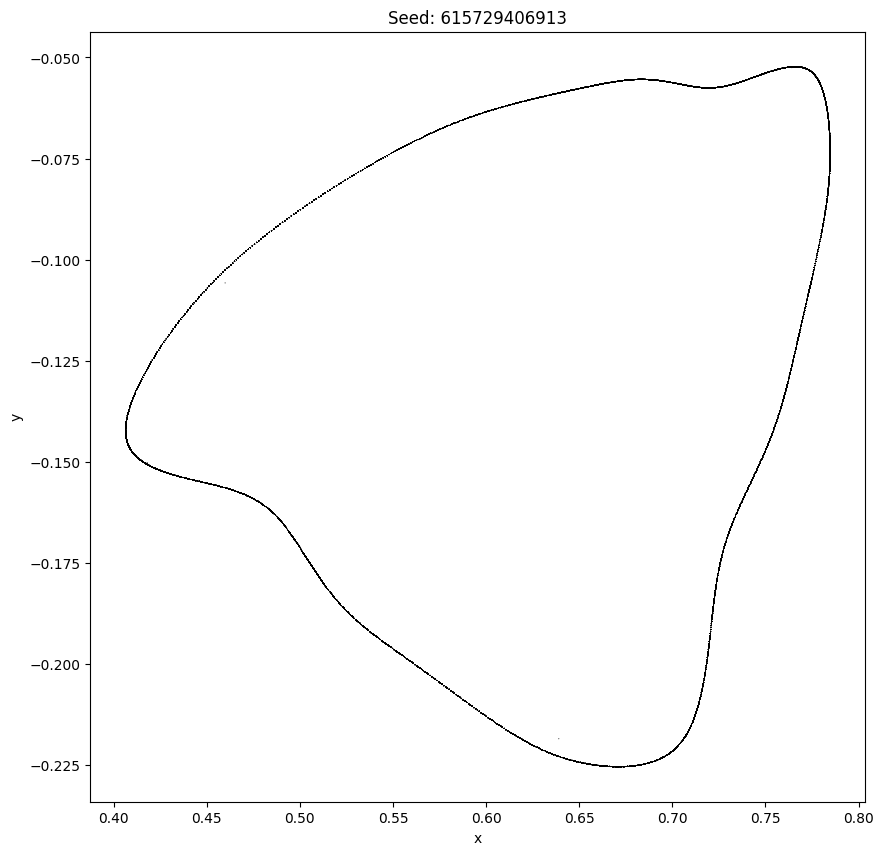

In [751]:
try_lots_of_quadratic_maps(1000)

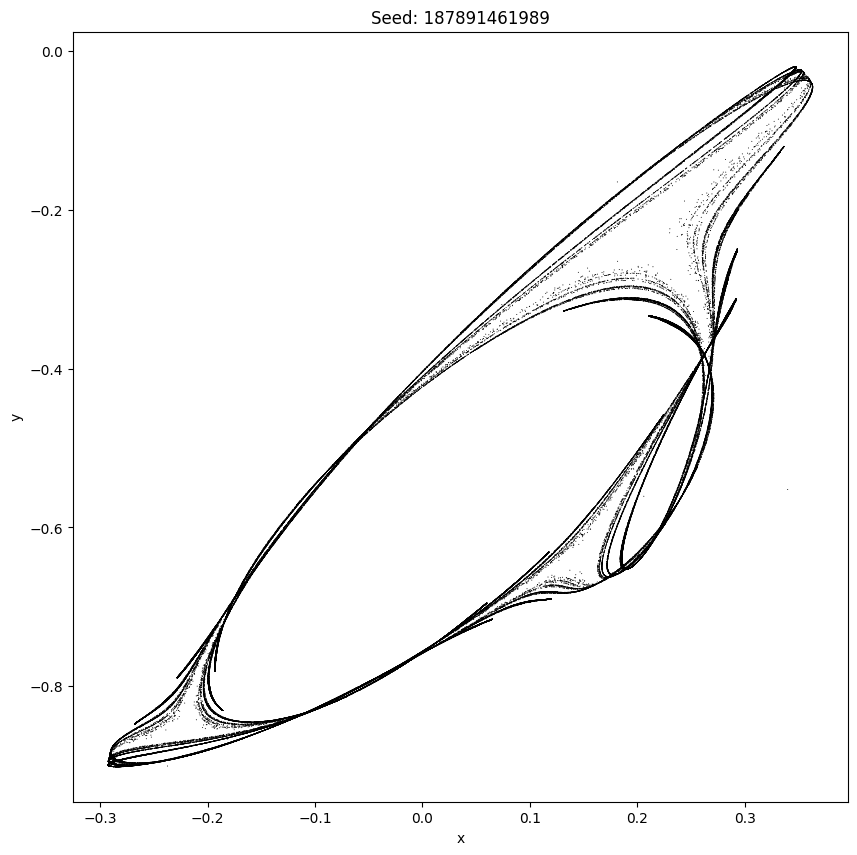

In [755]:
success, seed, x_list, y_list = try_quadratic_map(187891461989)

plot_quadratic_map(x_list, y_list, seed, save=True)